<h1 style='fontsize:48px; color:green;'> Pet Finder Data Visualization </h1>

Data provided by Kaggle's Pet Finder Machine Learning Competition.

In this Jupyter notebook, I will ingest, preprocess, clean, and visualize data from Pet Finder's Malaysian pet adoption website.

In [1]:
# training data is located in './train/train.csv'
!head train/train.csv

Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2
2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0
1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her

<h1 style='fontsize:20px; color:green; margin-left:10px;'> Data Exploration </h1>

In [2]:
# import pandas for data exploration

import pandas as pd

df_train = pd.read_csv('train/train.csv')

# describe the data
df_train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [3]:
# visualize first few data points
df_train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
#fill NaN with ''
df_train['Description'].fillna('', inplace=True)
df_train['Description'].isnull().any()

False

<h1 style='fontsize:20px; color:green; margin-left:10px;'> Yay, Visualizations! </h1>

<h3 style="color:blue; margin-left:10px;"> Dogs vs. Cats </h3>

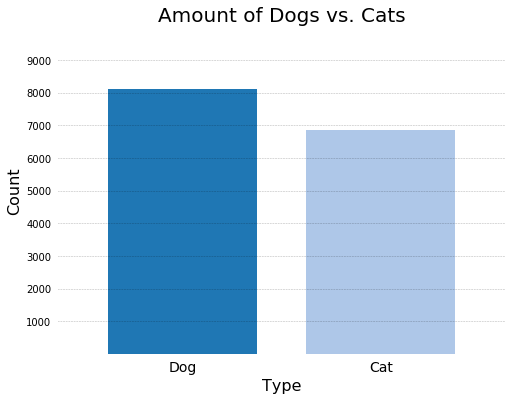

In [17]:
# import matplotlib, Jupyter magic for inline matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# these are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# scale the RGB values to the [0, 1] range.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[8,6])

# plot the data
df_train['Type'].value_counts().plot(kind='bar',color=tableau20, width=0.75)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Type',fontsize=16)
plt.ylabel('Count',fontsize=16)

plt.ylim([0,10000])

plt.yticks(range(1000, 9001, 1000))
plt.xticks([0,1],['Dog','Cat'],rotation=0,fontsize=14)
for y in range(1000, 9001, 1000):    
    plt.plot([-1,2], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title('Amount of Dogs vs. Cats',fontsize=20)
plt.show()

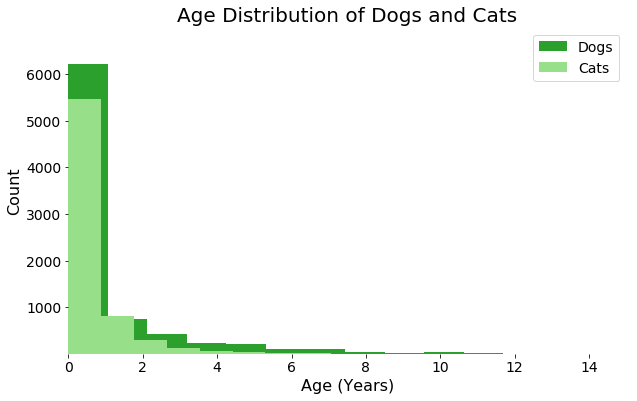

In [10]:
# plotting age distribution
plt.figure(figsize=(10,6))  
  
# remove chartjunk  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# axis ticks only on the bottom and left of the plot
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
 
plt.xlabel("Age (Years)", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

plt.xlim([0,15])
plt.ylim([0,7000])

plt.xticks(fontsize=14)  
plt.yticks(range(1000, 6001, 1000), fontsize=14)
  
# make sure the data is sorted into enough bins so you can see the distribution  
plt.hist(df_train[df_train['Type']==1]['Age']/12,
         color=tableau20[4], bins=20, label='Dogs')  
plt.hist(df_train[df_train['Type']==2]['Age']/12,
         color=tableau20[5], bins=20, label='Cats') 

plt.legend(fontsize=14)
plt.title('Age Distribution of Dogs and Cats',fontsize=20)
plt.show()

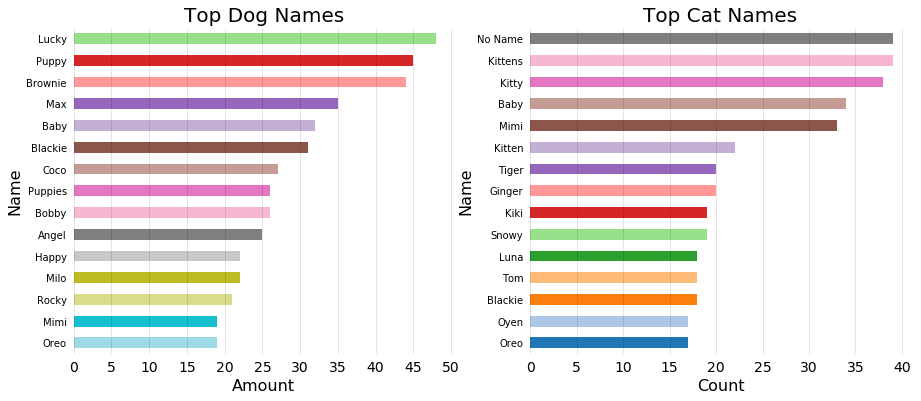

In [11]:
# visualizing top names for dogs and cats

plt.figure(figsize=[15,6])
ax=plt.subplot(121)

df_train[df_train['Type'] == 1]['Name'].value_counts(ascending=False).head(15)[::-1].plot(kind='barh',color=tableau20[::-1])

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xlabel('Amount',fontsize=16)
plt.ylabel('Name',fontsize=16)

plt.xticks(range(0,51,5),fontsize=14)
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.grid(which='major', axis='x', linestyle="--", lw=0.5, color="black", alpha=0.3)

plt.title('Top Dog Names',fontsize=20)

ax=plt.subplot(122)

df_train[df_train['Type'] == 2]['Name'].value_counts(ascending=False).head(15)[::-1].plot(kind='barh',color=tableau20)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xlabel('Count',fontsize=16)
plt.ylabel('Name',fontsize=16)

plt.xticks(range(0,41,5),fontsize=14)
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.grid(which='major', axis='x', linestyle="--", lw=0.5, color="black", alpha=0.3)

plt.title('Top Cat Names',fontsize=20)
plt.show()
plt.show()

In [12]:
# ingest breed labels

breed_labels = pd.read_csv('breed_labels.csv',index_col=0)
breed_labels.head()

,Type,BreedName
BreedID,,
1,1,Affenpinscher
2,1,Afghan Hound
3,1,Airedale Terrier
4,1,Akbash
5,1,Akita


In [13]:
# extract breed names and types

breed_names = breed_labels['BreedName']
breed_types = breed_labels['Type']
breed_names.head()

BreedID
1       Affenpinscher
2        Afghan Hound
3    Airedale Terrier
4              Akbash
5               Akita
Name: BreedName, dtype: object

In [14]:
# store DataFrame of breed names for the observations in the training set
# pass if Breed1 ID == 0 (treat as null)
train_breeds = pd.DataFrame([breed_names[i] for i in df_train['Breed1'] if i != 0], columns=['BreedName'])
train_breeds['Type'] = pd.Series([breed_types[i] for i in df_train['Breed1'] if i != 0])
train_breeds.head()

,BreedName,Type
0,Tabby,2
1,Domestic Medium Hair,2
2,Mixed Breed,1
3,Mixed Breed,1
4,Mixed Breed,1


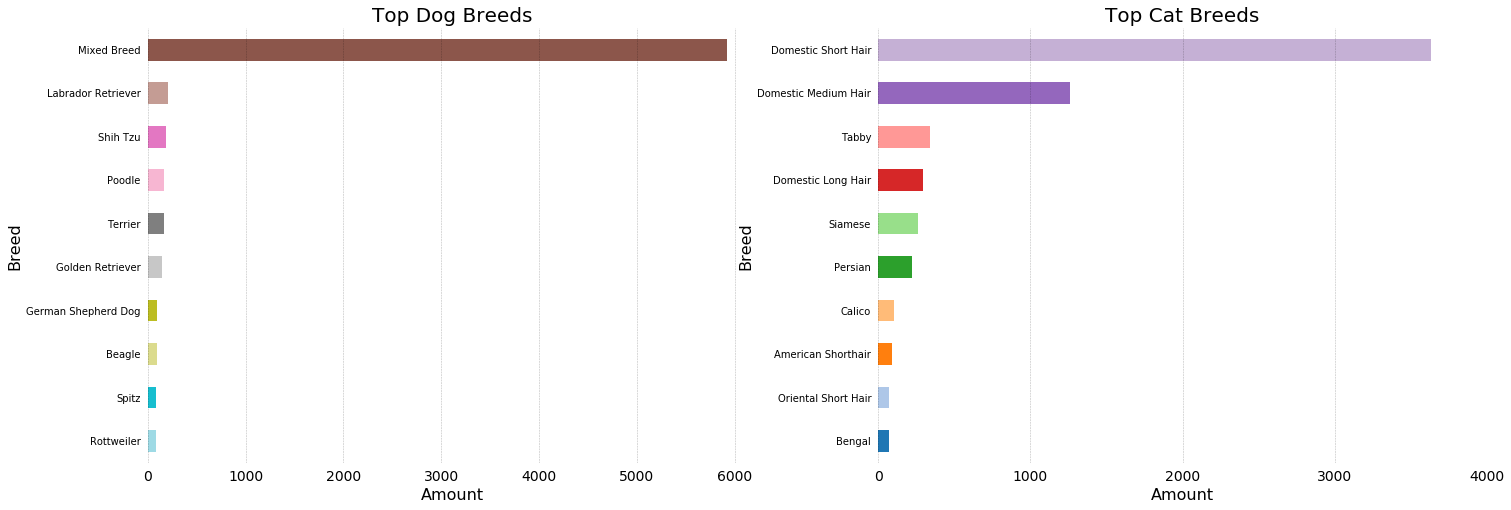

In [15]:
# visualizing top breed types

plt.figure(figsize=[24,8])
ax=plt.subplot(121)

train_breeds[train_breeds['Type'] == 1]['BreedName'].value_counts(ascending=False).head(10)[::-1].plot(kind='barh',color=tableau20[::-1])

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xlabel('Amount',fontsize=16)
plt.ylabel('Breed',fontsize=16)

plt.xticks(range(0,6001,1000),fontsize=14)
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.grid(which='major', axis='x', linestyle="--", lw=0.5, color="black", alpha=0.3)

plt.title('Top Dog Breeds',fontsize=20)

ax=plt.subplot(122)

train_breeds[train_breeds['Type'] == 2]['BreedName'].value_counts(ascending=False).head(10)[::-1].plot(kind='barh',color=tableau20)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xlabel('Amount',fontsize=16)
plt.ylabel('Breed',fontsize=16)

plt.xticks(range(0,4001,1000),fontsize=14)
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.grid(which='major', axis='x', linestyle="--", lw=0.5, color="black", alpha=0.3)

plt.title('Top Cat Breeds',fontsize=20)
plt.show()

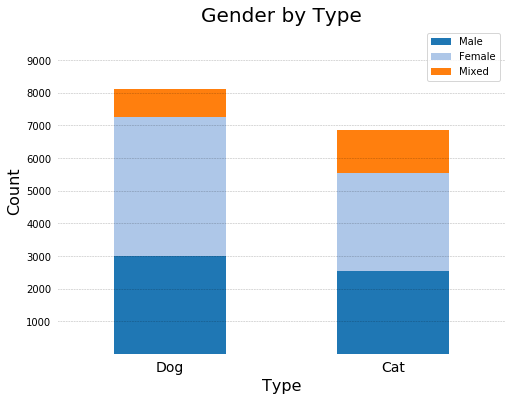

In [18]:
# visualizing gender count by type

fig, ax = plt.subplots(figsize=[8,6])

df_train.groupby(['Type','Gender'])['Type'].count().unstack().plot(kind='bar',stacked=True,color=tableau20,ax=ax)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Type',fontsize=16)
plt.ylabel('Count',fontsize=16)

plt.ylim([0,10000])

plt.xticks([0,1],['Dog','Cat'],rotation=0,fontsize=14)
plt.yticks(range(1000,9001,1000))
for y in range(1000, 9001, 1000):    
    plt.plot([-1,2], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male','Female','Mixed'])
plt.title('Gender by Type',fontsize=20)
plt.show()

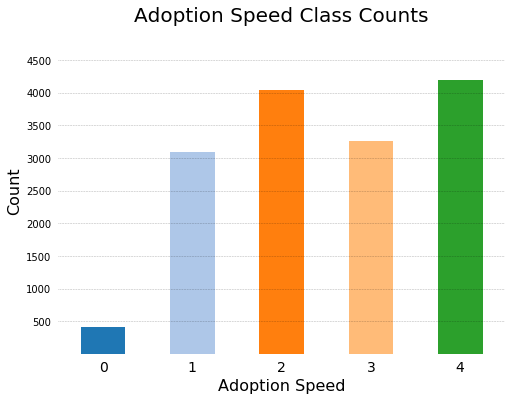

In [19]:
# visualize adoption speed class counts

fig, ax = plt.subplots(figsize=[8,6])

df_train['AdoptionSpeed'].value_counts(sort=False).plot(kind='bar',stacked=True,color=tableau20,ax=ax)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Adoption Speed',fontsize=16)
plt.ylabel('Count',fontsize=16)

plt.ylim([0,5000])

plt.xticks(rotation=0,fontsize=14)
plt.yticks(range(500,4501,500))
for y in range(500, 4501, 500):    
    plt.plot(range(-1,6), [y] * 7, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title('Adoption Speed Class Counts',fontsize=20)
plt.show()

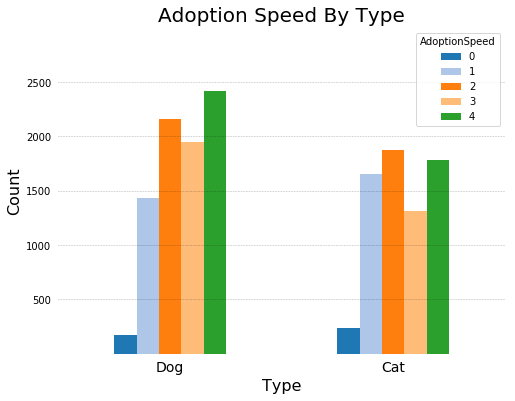

In [20]:
# visualize adoption speed by type

fig, ax = plt.subplots(figsize=[8,6])

df_train.groupby(['Type','AdoptionSpeed'])['Type'].count().unstack().plot(kind='bar',color=tableau20,ax=ax)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Type',fontsize=16)
plt.ylabel('Count',fontsize=16)

plt.ylim([0,3000])

plt.xticks([0,1],['Dog','Cat'],rotation=0,fontsize=14)
plt.yticks(range(500,2501,500))
for y in range(500, 2501, 500):    
    plt.plot(range(-1,6), [y] * 7, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title('Adoption Speed By Type',fontsize=20)
plt.show()

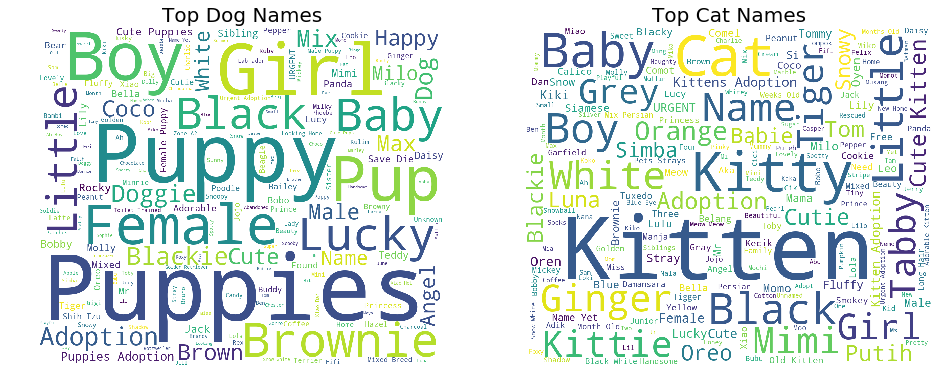

In [21]:
# wordcloud of top names

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_dog = ' '.join(df_train.loc[df_train['Type'] == 1, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top Dog Names', fontsize=20)
plt.axis("off")

plt.subplot(1, 2, 2)
text_cat = ' '.join(df_train.loc[df_train['Type'] == 2, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top Cat Names',fontsize=20)
plt.axis("off")

plt.show()

To be continued...